## k-최근접 이웃 알고리즘
- 가장 간단한 머신러닝 알고리즘으로서, 훈련 데이터셋을 그냥 저장하는 것이 모델을 만드는 과정의 전부
- 새로운 데이터 포인트에 대해 예측할 때 알고리즘이 훈련 데이터셋에서 가장 가까운 데이터 포인트인 '최근접 이웃'을 서칭

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
import mglearn

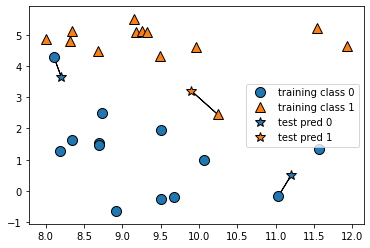

In [2]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

↑ forge 데이터셋에 대한 1-최근접 이웃 모델의 예측

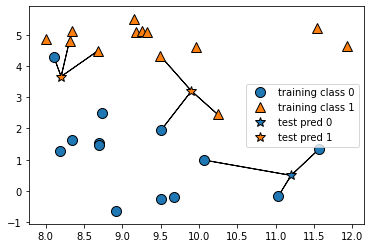

In [3]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

↑ forge 데이터셋에 대한 3-최근접 이웃 모델의 예측

In [4]:
from sklearn.model_selection import train_test_split

# Devide into train and test sets
X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [5]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=3)

In [6]:
# Train the model
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [7]:
print('테스트 세트 예측: ', clf.predict(X_test))

테스트 세트 예측:  [1 0 1 0 1 0 0]


In [8]:
print('테스트 세트 정확도: {:.2f}'.format(clf.score(X_test, y_test)))

테스트 세트 정확도: 0.86


-> 모델이 테스트 데이터셋에 있는 샘플 중 86%를 정확히 예측

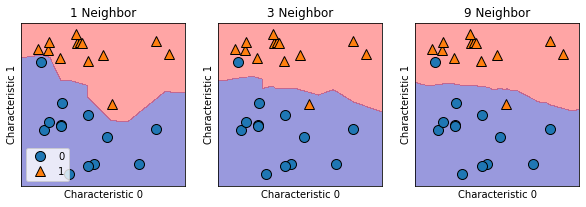

In [9]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    # fit 메소드는 self 오브젝트를 리턴
    # 객체 생성과 fit 메소드를 한 줄에 작성 가능
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title('{} Neighbor'.format(n_neighbors))
    ax.set_xlabel('Characteristic 0')
    ax.set_ylabel('Characteristic 1')
axes[0].legend(loc=3);

- 이웃을 하나 선택했을 때는 결정 경계가 훈련 데이터에 가깝게 따라가고 있음
- 이웃의 수를 늘릴수록 결정 경계는 더 부드러워짐
- 부드러운 경계는 더 단순한 모델을 의미
- 이웃을 적게 사용하면 모델의 복잡도가 높아지고, 많이 사용하면 복잡도는 낮아짐
- 훈련 데이터 전체 개수를 이웃의 수를 지정하는 극단적인 경우에는 모든 테스트 포인트가 같은 이웃을 가지게 되므로 테스트 포인트에 대한 예측은 모두 같은 값이 됨 -> 훈련 세트에서 가장 많은 데이터 포인트를 가진 클래스가 예측값이 됨

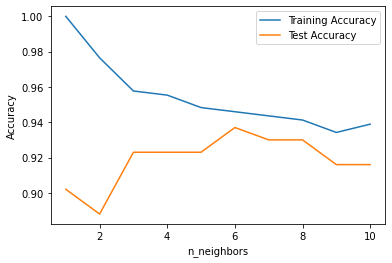

In [10]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []
# 1에서 10까지 n_neighbors를 적용
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # Create a model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # Save the accuracy of the train set
    training_accuracy.append(clf.score(X_train, y_train))
    # Save accuracy of generalization
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label='Training Accuracy')
plt.plot(neighbors_settings, test_accuracy, label='Test Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('n_neighbors')
plt.legend();

- 최근접 이웃의 수가 하나일 때는 훈련 데이터에 대한 예측이 완벽
- 이웃의 수가 늘어나면 모델은 단순해지고 훈련 데이터의 정확도는 줄어듦
- 이웃을 하나 사용한 테스트 세트의 정확도는 이웃을 많이 사용했을 때보다 낮음 -> 최근접 이웃이 모델을 너무 복잡하게 만든다는 것을 설명
- 이웃을 10개 사용했을 때는 모델이 너무 단순해서 정확도는 더 나빠짐